# T / S Heatmap

In [1]:
using CSV
using DataFrames
using Dates
using Glob
using Plots
using StatsBase: mean

In [2]:
function csv_to_df(dir_name_vec::Vector{String})::Vector{DataFrame}
    csv_file_names = []

    for dir_name in dir_name_vec
        append!(csv_file_names, glob("../output/$(dir_name)/*.csv"))
        append!(csv_file_names, glob("../output/$(dir_name)/**/*.csv"))
    end
    
    return [CSV.File(csv_file_name) |> DataFrame for csv_file_name in csv_file_names]
end

calc_cooperation_rate_mean(df::DataFrame)::DataFrame = combine(groupby(df, 1:15), :cooperation_rate => mean => :cooperation_rate)

make_mean_df(df_vec::Vector{DataFrame})::DataFrame = vcat([calc_cooperation_rate_mean(df) for df in df_vec]...)

function get_value(
    df::AbstractDataFrame,
    x::Float64,
    y::Float64,
    x_symbol::Symbol,
    y_symbol::Symbol,
    value_symbol::Symbol,
)::Union{Float64,Missing}
    values = df[df[:, x_symbol] .== x .&& df[:, y_symbol] .== y, value_symbol]
    if length(values) > 0
        mean(values)
    else
        missing
    end
end

COLOR_MAP = cgrad([
    RGB(0xB3/255, 0x20/255, 0x34/255),  # red   #B32034
    RGB(0xE3/255, 0xE3/255, 0xE3/255),  # white #E3E3E3
    RGB(0x2D/255, 0x57/255, 0x9A/255)   # blue  #2D579A
])

function plot_TS_heatmap(df::AbstractDataFrame)::Plots.Plot
    T = sort(unique(df.initial_T))
    S = sort(unique(df.S))

    mat = reshape([get_value(df, t, s, :initial_T, :S, :cooperation_rate) for s in S, t in T], length(S), length(T))
    
    p = heatmap(
        T,
        S,
        mat,
        xlabel = "T",
        ylabel = "S",
        xlims = (-0.05, 2.05),
        ylims = (-1.05, 1.05),
        color = COLOR_MAP,
        clims = (0.05, 0.95),
        xticks = 0:0.2:2,
        yticks = -1:0.2:1,
        # tickfontsize = 24,
        # guidefontsize = 36,
        # left_margin = 4 * Plots.PlotMeasures.mm,
        # bottom_margin = 1 * Plots.PlotMeasures.mm,
        # size=(1250, 1000),
    )
    plot!([-0.05, 2.05], [0, 0], color = :black, lw = 1, legend = false)
    plot!([1, 1], [-1.05, 1.05], color = :black, lw = 1, legend = false)
    plot!([2.05, 2.05], [-1.05, 1.05], color = :black, lw = 1, legend = false)
    plot!([-0.05, 2.05], [1.05, 1.05], color = :black, lw = 1, legend = false)

    return p
end;

2024-02-02 16:23:10
nrow(df) = 62
initial_N = 1000, initial_k = 100, initial_w = 0.5, Δw = 0.05, interaction_freqency = 1.0, reproduction_rate = 0.05, δ = 1.0, initial_μ_s = 0.01, initial_μ_r = 0.01, β = 0.0, sigma = 0.0, generations = 10000, variability_mode = POPULATION

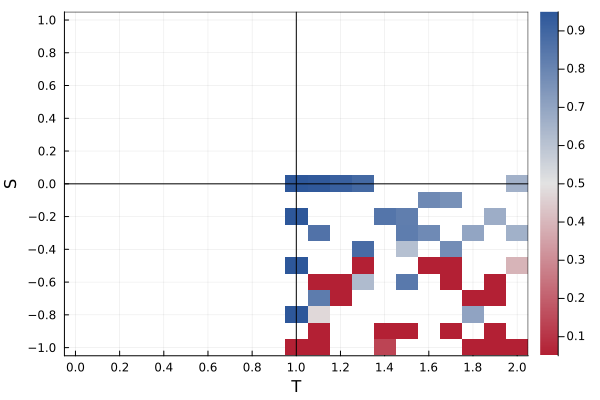

nrow(df) = 82
initial_N = 1000, initial_k = 100, initial_w = 0.5, Δw = 0.05, interaction_freqency = 1.0, reproduction_rate = 0.05, δ = 1.0, initial_μ_s = 0.01, initial_μ_r = 0.01, β = 0.4, sigma = 100.0, generations = 10000, variability_mode = POPULATION

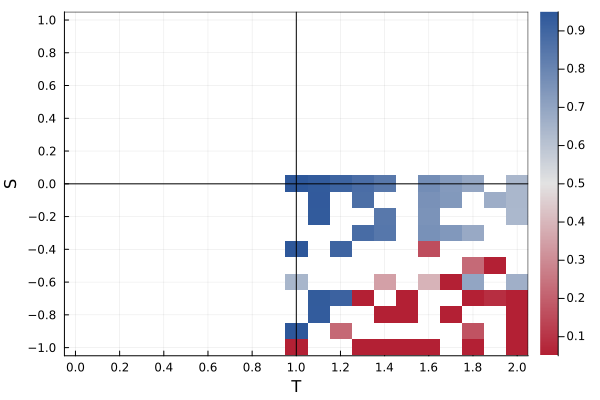

nrow(df) = 71
initial_N = 1000, initial_k = 100, initial_w = 0.5, Δw = 0.05, interaction_freqency = 1.0, reproduction_rate = 0.05, δ = 1.0, initial_μ_s = 0.01, initial_μ_r = 0.01, β = 0.8, sigma = 200.0, generations = 10000, variability_mode = POPULATION

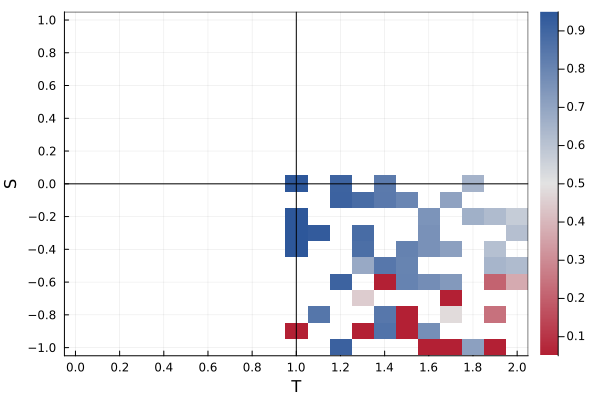

nrow(df) = 82
initial_N = 1000, initial_k = 500, initial_w = 0.5, Δw = 0.05, interaction_freqency = 1.0, reproduction_rate = 0.05, δ = 1.0, initial_μ_s = 0.01, initial_μ_r = 0.01, β = 0.4, sigma = 100.0, generations = 10000, variability_mode = POPULATION

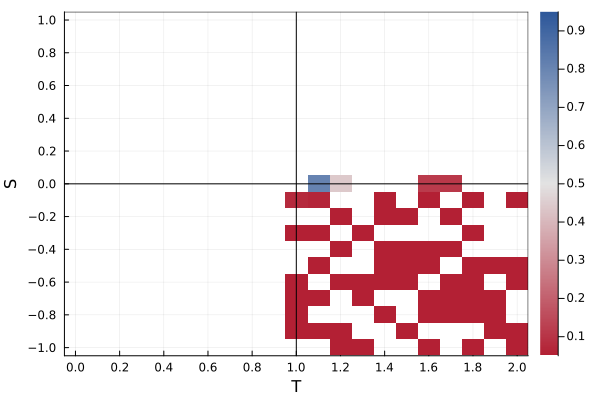

nrow(df) = 58
initial_N = 1000, initial_k = 500, initial_w = 0.5, Δw = 0.05, interaction_freqency = 1.0, reproduction_rate = 0.05, δ = 1.0, initial_μ_s = 0.01, initial_μ_r = 0.01, β = 0.8, sigma = 200.0, generations = 10000, variability_mode = POPULATION

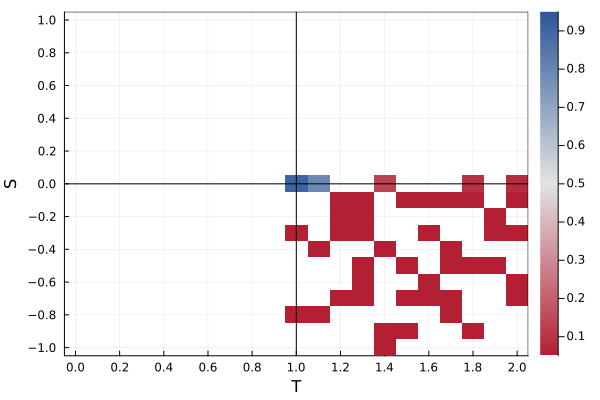

nrow(df) = 72
initial_N = 1000, initial_k = 500, initial_w = 0.5, Δw = 0.05, interaction_freqency = 1.0, reproduction_rate = 0.05, δ = 1.0, initial_μ_s = 0.01, initial_μ_r = 0.01, β = 0.0, sigma = 0.0, generations = 10000, variability_mode = POPULATION

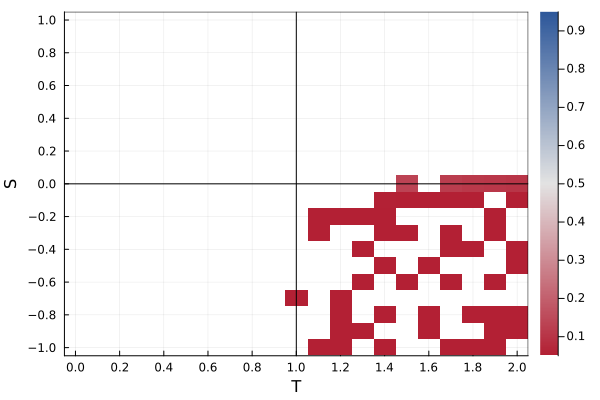

nrow(df) = 69
initial_N = 1000, initial_k = 990, initial_w = 0.5, Δw = 0.05, interaction_freqency = 1.0, reproduction_rate = 0.05, δ = 1.0, initial_μ_s = 0.01, initial_μ_r = 0.01, β = 0.4, sigma = 100.0, generations = 10000, variability_mode = POPULATION

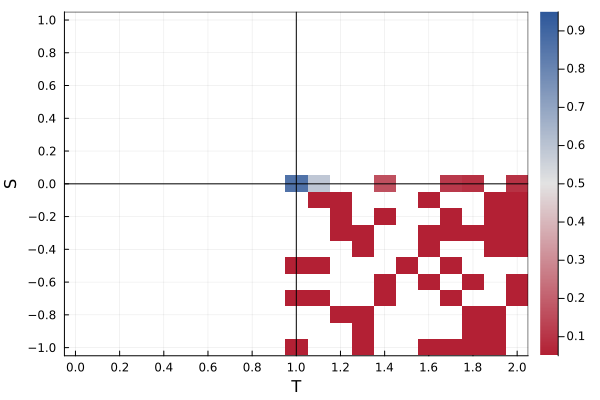

nrow(df) = 69
initial_N = 1000, initial_k = 990, initial_w = 0.5, Δw = 0.05, interaction_freqency = 1.0, reproduction_rate = 0.05, δ = 1.0, initial_μ_s = 0.01, initial_μ_r = 0.01, β = 0.0, sigma = 0.0, generations = 10000, variability_mode = POPULATION

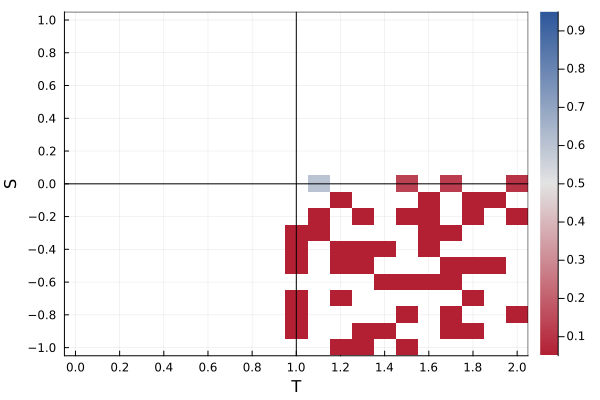

nrow(df) = 58
initial_N = 1000, initial_k = 990, initial_w = 0.5, Δw = 0.05, interaction_freqency = 1.0, reproduction_rate = 0.05, δ = 1.0, initial_μ_s = 0.01, initial_μ_r = 0.01, β = 0.8, sigma = 200.0, generations = 10000, variability_mode = POPULATION

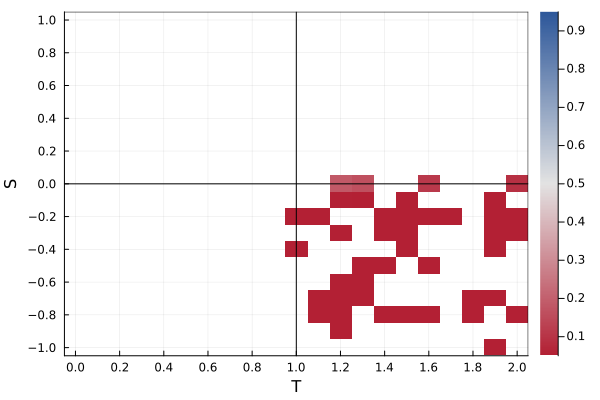

In [3]:
println(Dates.format(now(), "YYYY-mm-dd HH:MM:SS"))

df_vec = csv_to_df([
    # "20240126_NC_TS_Heatmap", # 正規化パターン 3
    # "20240128_NC_TS_Heatmap", # 正規化パターン 4
    # "20240129_NC_TS_Heatmap", # 正規化パターン 5
    "20240201_202134",
    # "20240201_202252",
])
mean_df = sort(make_mean_df(df_vec))
for df in groupby(mean_df, names(mean_df)[[1:2; 5:15]])
    @show nrow(df)
    title = join(["$(k) = $(v)" for (k, v) in pairs(df[1, [1:2; 5:15]])], ", ")
    print(title)
    p = plot_TS_heatmap(df)
    display(p)
    savefig(p, "../img/NC/fig_TS_heatmap.png")
end

In [4]:
grouped = groupby(mean_df, [:initial_T, :S])
result = combine(grouped, :cooperation_rate => mean => :cooperation_rate, :cooperation_rate => length => :count)

# maximum(result.count) = 18
# mean(result.count) = 6.504545454545455
# minimum(result.count) = 1
# mean(result[(result.initial_T .> 1.0) .& (result.S .< 0.0), :count]) = 10.07
@show maximum(result.count)
@show mean(result.count)
@show minimum(result.count)
@show mean(result[((result.initial_T .> 1.0) .& (result.S .< 0.0)), :count])

result[
    ((result.initial_T .== 1.5) .& (result.S .== -0.5)) .||
    ((result.initial_T .== 1.6) .& (result.S .== -0.6)) .||
    ((result.initial_T .== 1.7) .& (result.S .== -0.7)) .||
    ((result.initial_T .== 1.8) .& (result.S .== -0.8)) .||
    ((result.initial_T .== 1.9) .& (result.S .== -0.9)) .||
    ((result.initial_T .== 2.0) .& (result.S .== -1.0)), :]

maximum(result.count) = 12
mean(result.count) = 5.148760330578512
minimum(result.count) = 1
mean(result[(result.initial_T .> 1.0) .& (result.S .< 0.0), :count]) = 5.16


Row,initial_T,S,cooperation_rate,count
,Float64,Float64,Float64,Int64
1,1.5,-0.5,0.210282,4
2,1.6,-0.6,0.228038,7
3,1.7,-0.7,0.00958602,4
4,1.8,-0.8,0.124841,6
5,1.9,-0.9,0.0078875,5
6,2.0,-1.0,0.00743396,3
